<h1>
  <center><strong>MovieLens Exploratory Data Analysis (EDA)</strong></center>
</h1>

---
<br>

I used the **MovieLens** dataset for Exploratory Data Analysis. The dataset available on [MovieLens](https://grouplens.org/datasets/movielens/). It contains 27753444 ratings and 1108997 tag applications across 58098 movies. These data were created by 283228 users between January 09, 1995 and September 26, 2018. This dataset was generated on September 26, 2018.


The data are contained in the files *genome-scores.csv, genome-tags.csv, links.csv, movies.csv, ratings.csv and tags.csv*. I only use **movie.csv** and **rating.csv**.




<h2>
  This Notebook Cover This Questions:
</h2>

<h3>Movie CSV</h3>

1.   [Find the number of released movies for each year](#movie_q1)
2.   [Find the number of movies released in last 15 years.](#movie_q2)
3.   [Find the number of movies released in different genres last 10 years.](#movie_q3)
4.   [Genres in Movies](#movie_q4)
5.   [Show Percantage of Genres.](#movie_q5)
6.   [Find the 5 years in which the most movies were released and list their genres for each year](#movie_q6)


<h3>Rating CSV</h3>

1.  [Total Number of Per Rating](#rating_q1)
2.  [Find the counts of ratings for each year](#rating_q2)
3.  [Find the counts of ratings per month](#rating_q3)
4.  [Find top 10 users based on counts of ratings. Visualize it.](#rating_q4)
5.  [Count of unique users per year](#rating_q5)
6.  [Find the 10 Rated Movies and Counts](#rating_q6)
7.  [Top 10 Movies by Overall Rating (Sum of Rating/count of rating)](#rating_q7)
8.  [Top 10 Movies by Overall Rating (With over 500 ratings count)](#rating_q8)


### **Import Libraries**

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

## **Movie CSV**

In [2]:
movie_df = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")

In [3]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_df.tail()

,movieId,title,genres
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [6]:
print(f"Shape : {movie_df.shape} \nSize  :  {movie_df.size}")

Shape : (27278, 3) 
Size  :  81834


In [7]:
movie_df.sample(5)

,movieId,title,genres
6806,6917,Promised Land (1987),Drama
26066,125095,Topaze (1933),Comedy|Drama
22279,107130,"Adventure in Space and Time, An (2013)",Drama
5045,5141,"Bad News Bears in Breaking Training, The (1977)",Comedy
2593,2679,Finding North (1998),Comedy|Drama|Romance


In [8]:
movie_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
movie_df.nunique()

movieId    27278
title      27262
genres      1342
dtype: int64

In [10]:
movie_df.isna().sum()
#movie_df.dropna( )

movieId    0
title      0
genres     0
dtype: int64

In [11]:
movie_df.duplicated().sum()

0

In [12]:
movie_df.index

RangeIndex(start=0, stop=27278, step=1)

In [13]:
def preprocess_movie_csv(movie_df):

  ''' 
   Extract years by finding 4 consecutive numbers. (d+ does not work properly if you have numbers in title) 
   Find all  unique genres
  '''

  df = movie_df.copy()
  df['release_year'] = df.title.str.extract("\((\d{4})\)", expand=True).astype(str)
  df['title'] = df.title.str[:-7]
  df = df.join(df['genres'].str.get_dummies().astype(bool))
  df.drop('genres', inplace=True, axis=1)
  return df

In [14]:
processed_movie_df = preprocess_movie_csv(movie_df)
processed_movie_df.rename(columns={"(no genres listed)": "No Genre"}, inplace=True)
processed_movie_df

,movieId,title,release_year,No Genre,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben,2007,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
27274,131256,"Feuer, Eis & Dosenbier",2002,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
27275,131258,The Pirates,2014,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27276,131260,Rentun Ruusu,2001,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df_movie_titles = processed_movie_df[['movieId','title']]
df_movie_titles

,movieId,title
0,1,Toy Story
1,2,Jumanji
2,3,Grumpier Old Men
3,4,Waiting to Exhale
4,5,Father of the Bride Part II
...,...,...
27273,131254,Kein Bund für's Leben
27274,131256,"Feuer, Eis & Dosenbier"
27275,131258,The Pirates
27276,131260,Rentun Ruusu


<a name='movie_q1'></a>
### **1. Find the number of released movies for each year**

In [16]:
years = processed_movie_df.release_year.unique()
years.sort()
print(years)

['1891' '1893' '1894' '1895' '1896' '1898' '1899' '1900' '1901' '1902'
 '1903' '1905' '1909' '1910' '1912' '1913' '1914' '1915' '1916' '1917'
 '1918' '1919' '1920' '1921' '1922' '1923' '1924' '1925' '1926' '1927'
 '1928' '1929' '1930' '1931' '1932' '1933' '1934' '1935' '1936' '1937'
 '1938' '1939' '1940' '1941' '1942' '1943' '1944' '1945' '1946' '1947'
 '1948' '1949' '1950' '1951' '1952' '1953' '1954' '1955' '1956' '1957'
 '1958' '1959' '1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967'
 '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977'
 '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987'
 '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997'
 '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007'
 '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' 'nan']


<AxesSubplot:title={'center':'Number of movies released per year'}, xlabel='release_year'>

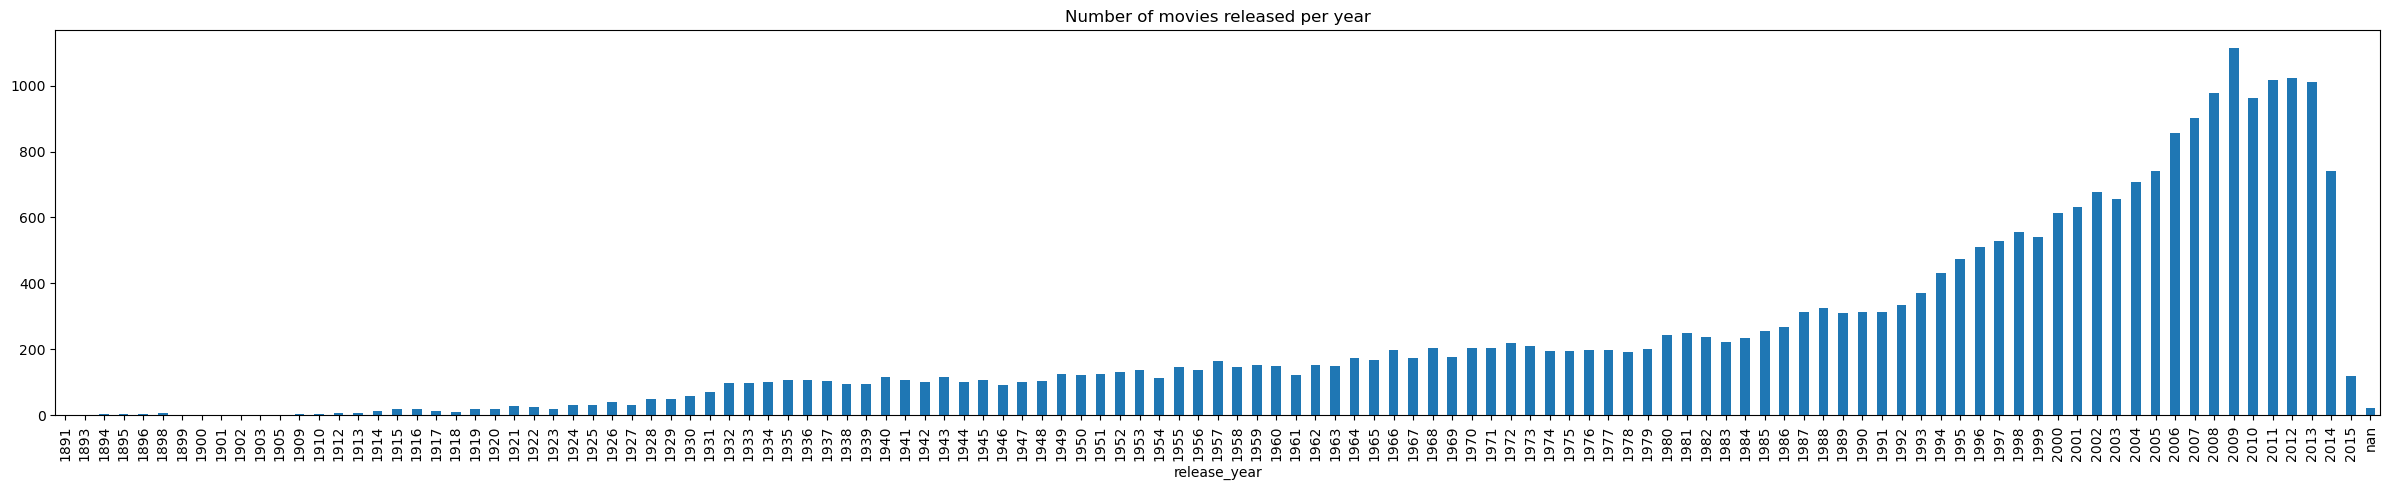

In [17]:
df_temp = processed_movie_df.groupby(['release_year'])['title'].count()
df_temp.plot.bar(x='year', y='movies', title='Number of movies released per year', figsize=(30, 5))

<a name='movie_q2'></a>

###**2. Find the number of movies released in last 15 years.**


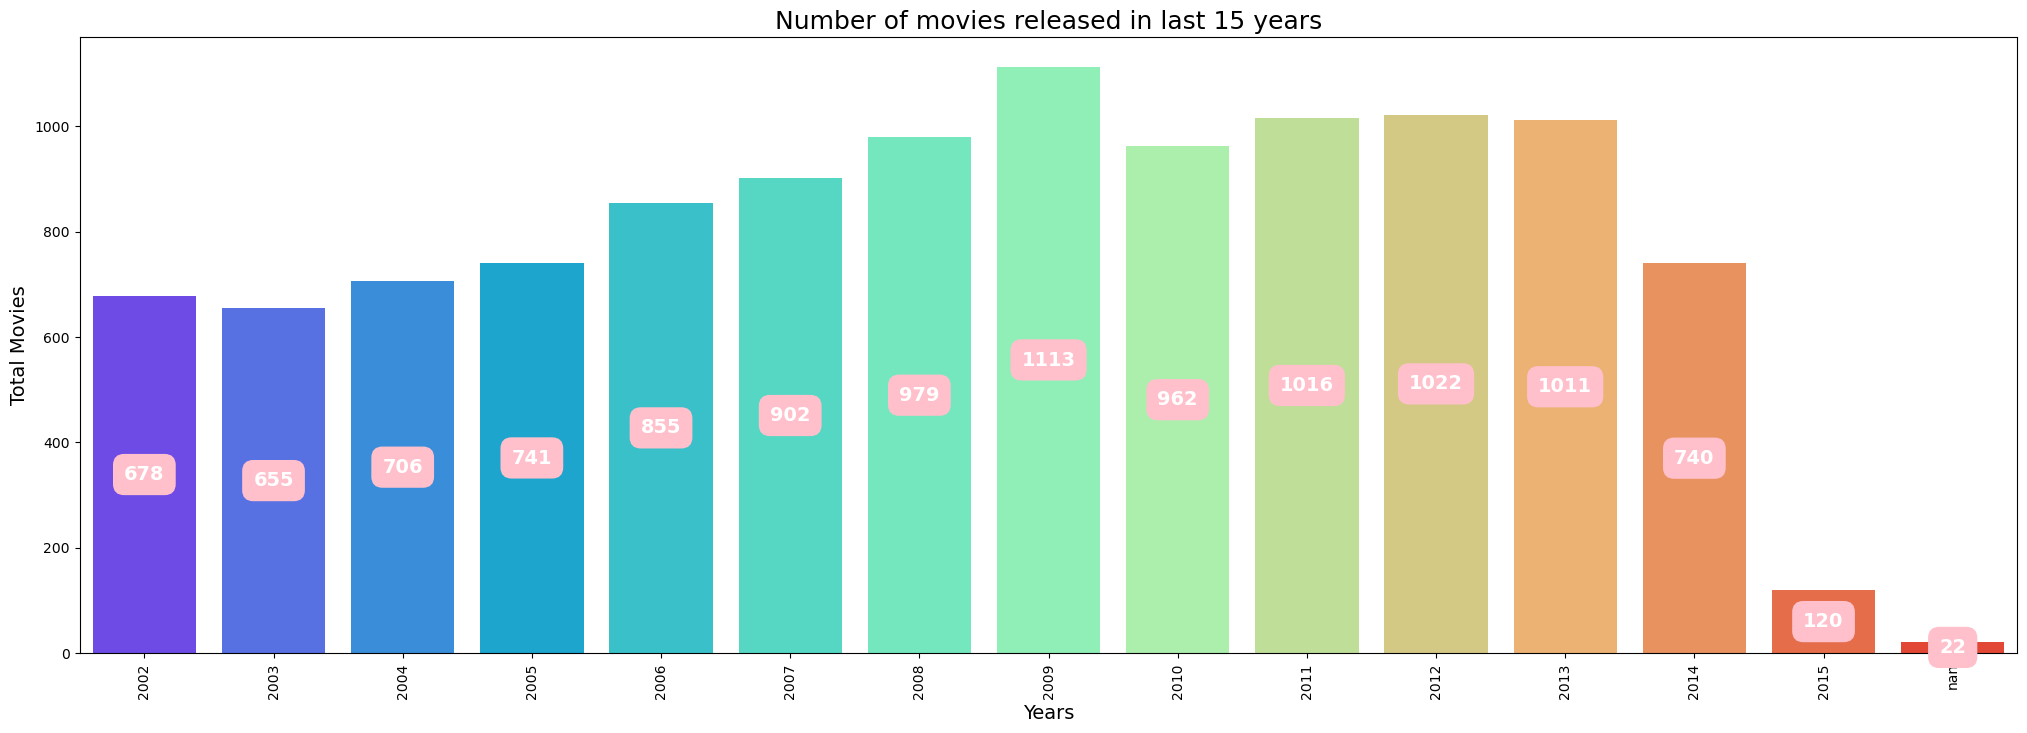

In [18]:
df_temp = processed_movie_df.groupby(['release_year'])['title'].count().tail(15)
plt.figure(figsize=(25,8))
ax= sns.barplot(x=df_temp.index,y=df_temp.values, data=processed_movie_df,palette='rainbow')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()), 
            ha = 'center', va='center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))

plt.xlabel('Years',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Total Movies',fontsize=14)
plt.title("Number of movies released in last 15 years", fontsize=18)
plt.show()


<a name='movie_q3'></a>
###**3. Find the number of movies released in different genres last 10 years.**


In [19]:
genres_unique = pd.DataFrame(pd.DataFrame(movie_df.genres.str.split('|').tolist()).stack().unique(), columns=['genre'])
genres_unique[-1:]= "No Genre"
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


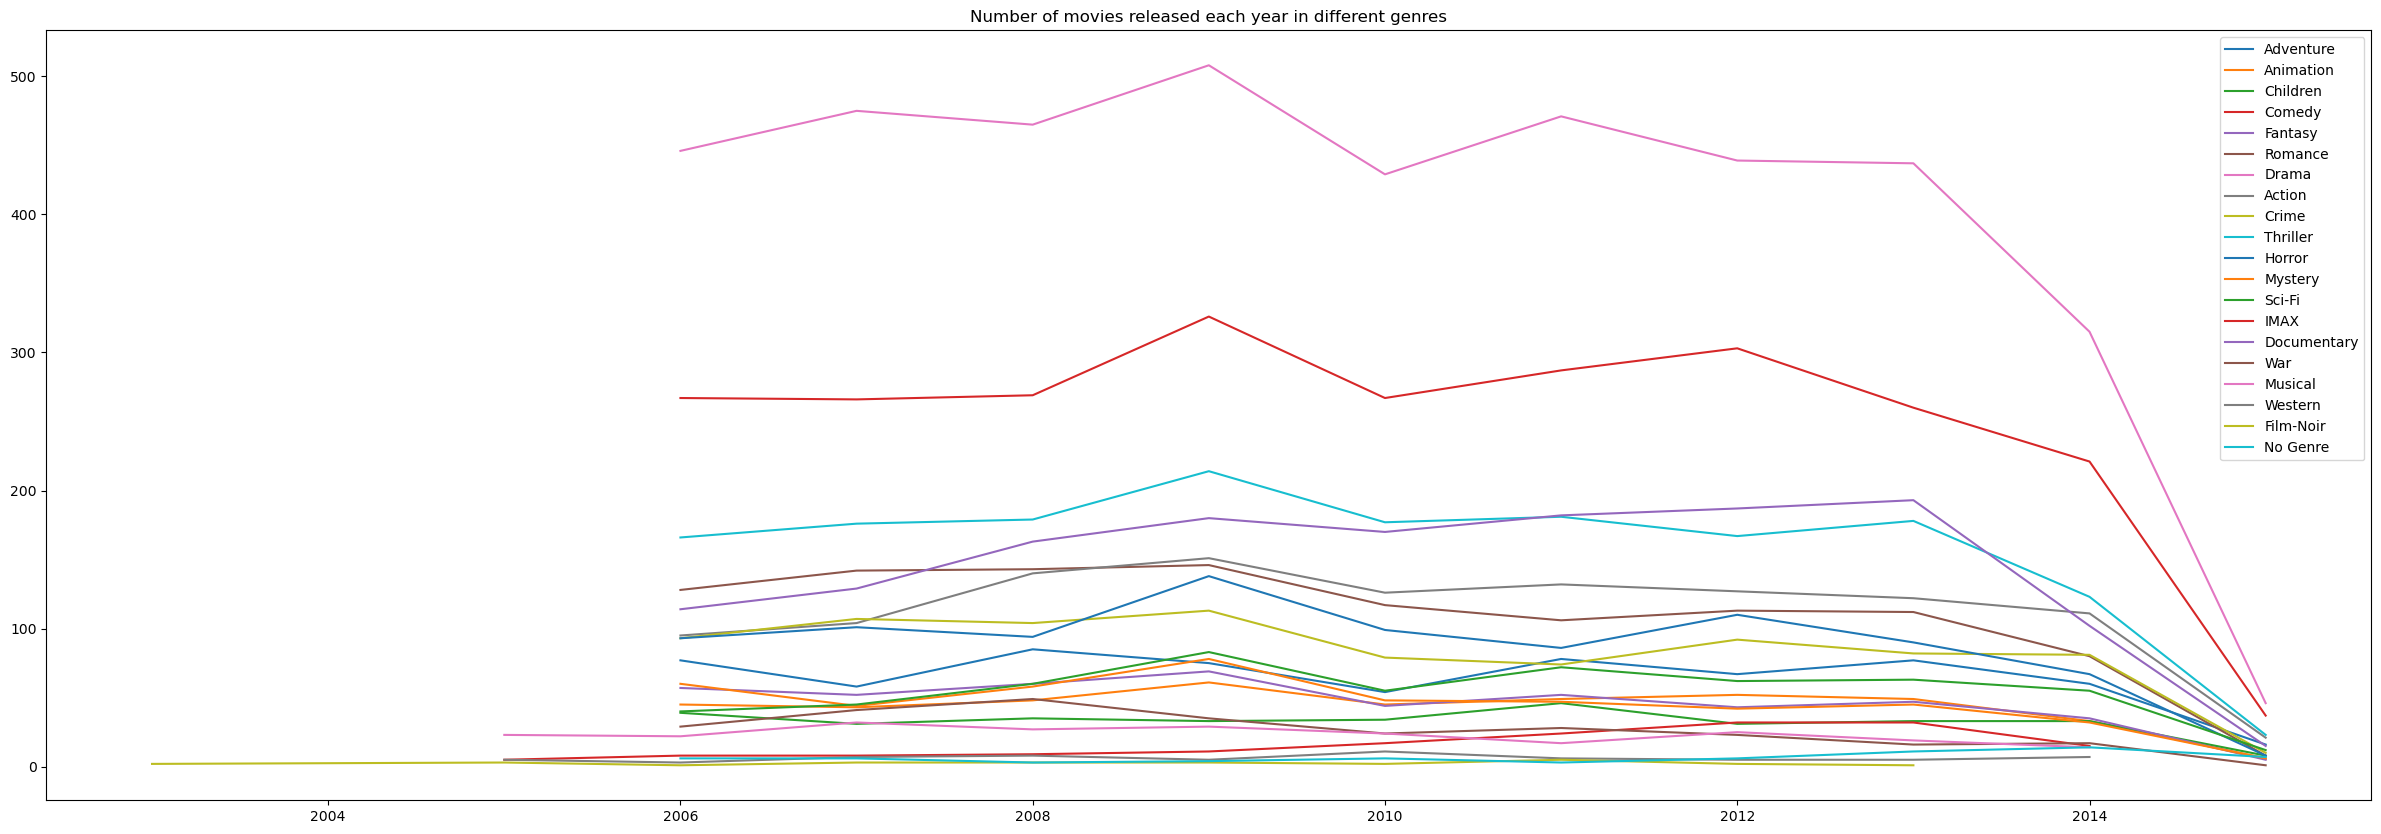

In [20]:
plt.figure(figsize=(30,10)) 
for genre in genres_unique.genre:
    df_temp = processed_movie_df[processed_movie_df[genre]==True][['release_year', 'movieId']]

    #fill na with mean of the years
    df_temp['release_year'] = pd.to_numeric(df_temp['release_year'], errors='coerce')
    df_temp['release_year'].fillna(int(df_temp['release_year'].mean()), inplace=True)
    df_temp['release_year'] =df_temp['release_year'].astype(int)  
    df_temp = df_temp.groupby(['release_year']).count().reset_index().tail(10)
    plt.plot(df_temp['release_year'], df_temp['movieId'], label=genre)
plt.title('Number of movies released each year in different genres')
plt.legend()
plt.show()

<a name='movie_q4'></a>
### **4. Genres in Movies**

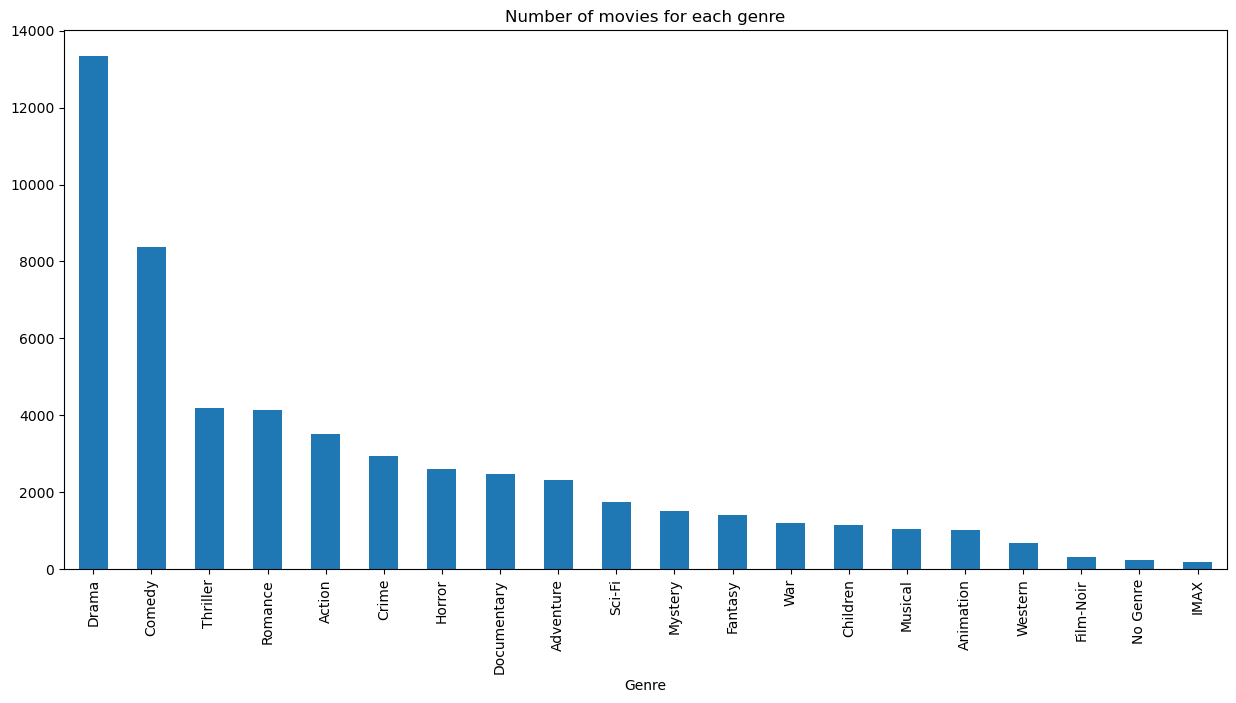

In [21]:
df_genres = pd.DataFrame(columns=['genre', 'num_movies'])

for genre in genres_unique.genre:
    row = [genre, processed_movie_df[processed_movie_df[genre]==True][['movieId']].count()]
    df_genres.loc[len(df_genres)] = row
    
df_genres['num_movies'] = df_genres['num_movies'].astype(np.int32)
df_genres = df_genres.sort_values('num_movies', ascending=False).set_index('genre')
plot_fig = df_genres['num_movies'].plot(kind='bar', figsize=(15,7))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plot_fig.set_title('Number of movies for each genre')
plot_fig.set_xlabel('Genre');

<a name='movie_q5'></a>
### **5. Show Percentage of Genres**

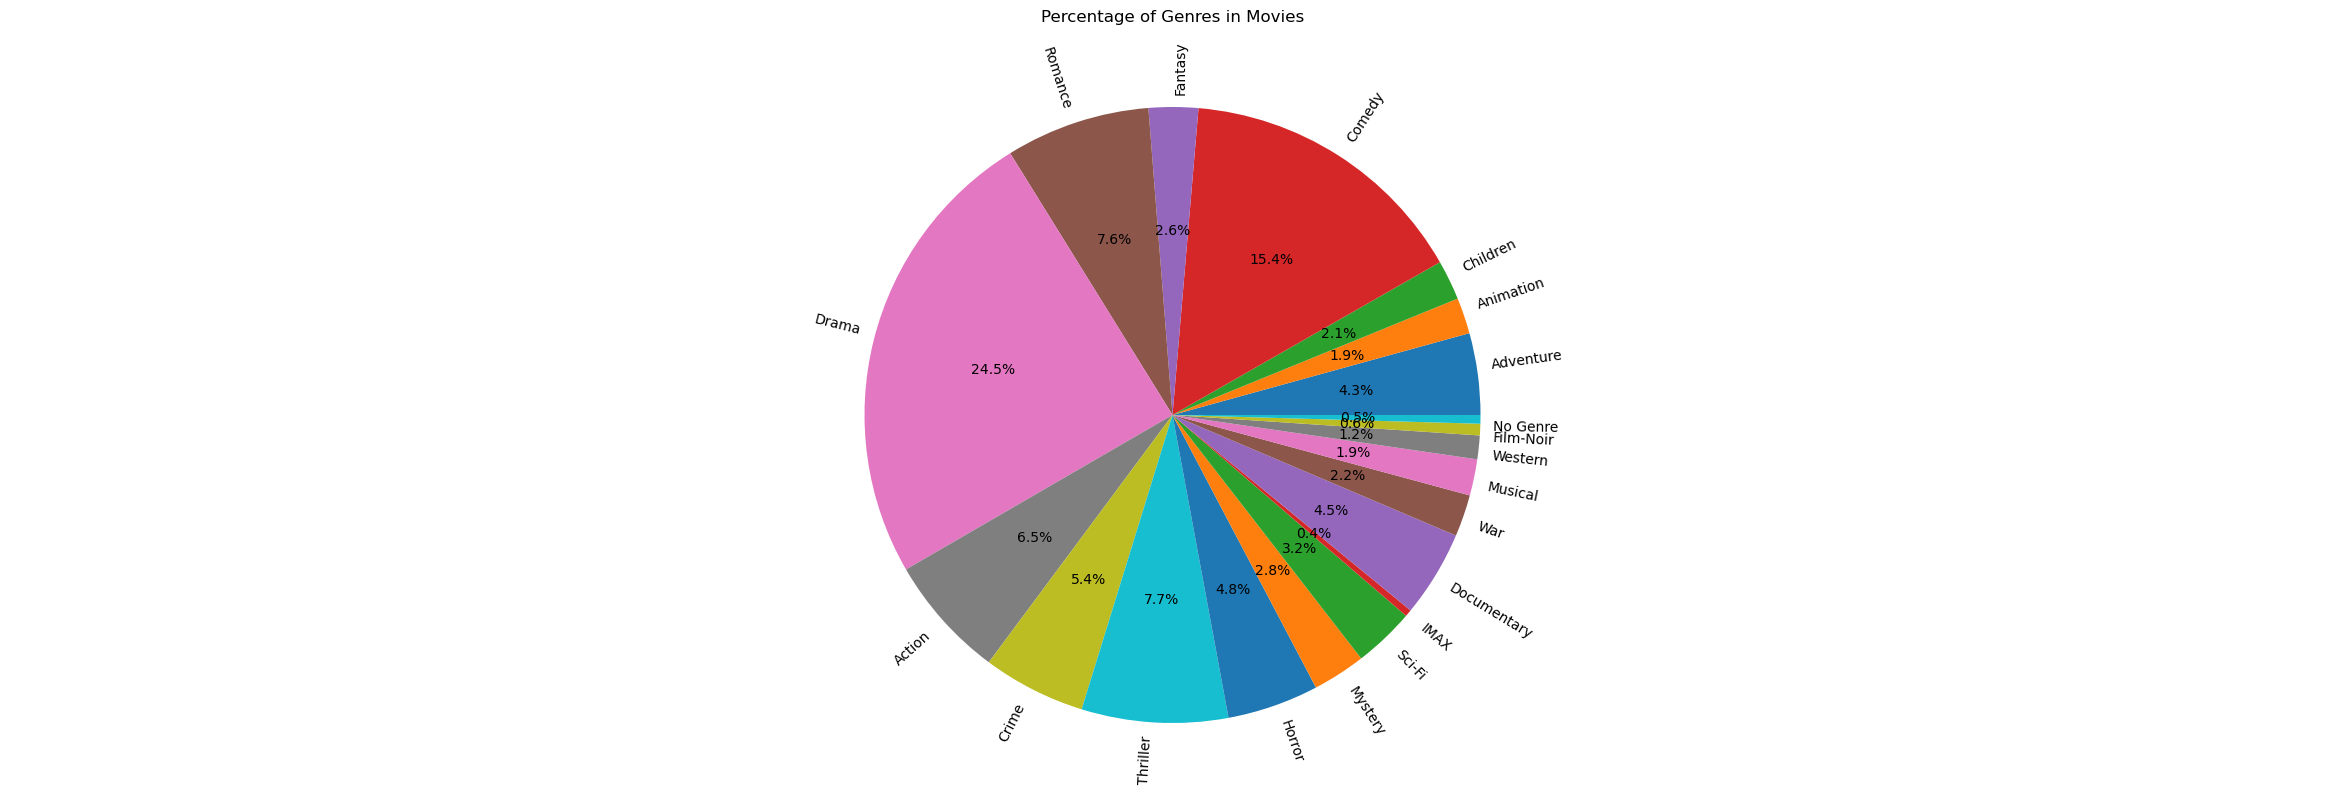

In [22]:
df_genres = pd.DataFrame(columns=['genre', 'num_movies'])

for genre in genres_unique.genre:
    row = [genre, processed_movie_df[processed_movie_df[genre]==True][['movieId']].count()]
    df_genres.loc[len(df_genres)] = row
plt.figure(figsize=(30,10)) 
plt.axis('equal');
plt.pie(df_genres['num_movies'], labels=df_genres['genre'], autopct='%.1f%%', labeldistance=1.04, rotatelabels=True)
plt.title("Percentage of Genres in Movies")
plt.show()

<a name='movie_q6'></a>
### **6. Find the 5 years in which the most movies were released and list their genres for each year**

In [23]:
df_temp = processed_movie_df.groupby(['release_year'])['title'].count().nlargest(5)
print(df_temp.index.values)

['2009' '2012' '2011' '2013' '2008']


In [24]:
top_years = processed_movie_df[processed_movie_df["release_year"].isin(df_temp.index)].sort_values(by='release_year', ascending=False).reset_index()
top_years[top_years['release_year'].astype(int)==2014]

,index,movieId,title,release_year,No Genre,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [25]:
df_genres = pd.DataFrame(columns=['year','genre', 'num_movies'])

for i in range(len(df_temp)):
  for genre in genres_unique.genre:
      df_year = top_years[top_years['release_year'].astype(int)==int(df_temp.index[i])]
      row = [df_temp.index[i], genre, df_year[df_year[genre]==True][['movieId']].count()]
      df_genres.loc[len(df_genres)] = row

df_genres['year'] = df_genres['year'].astype(np.int32)
df_genres['num_movies'] = df_genres['num_movies'].astype(np.int32)
df_genres = df_genres.sort_values('num_movies', ascending=False)


In [26]:
df_genres =df_genres.sort_values(by=['year'])

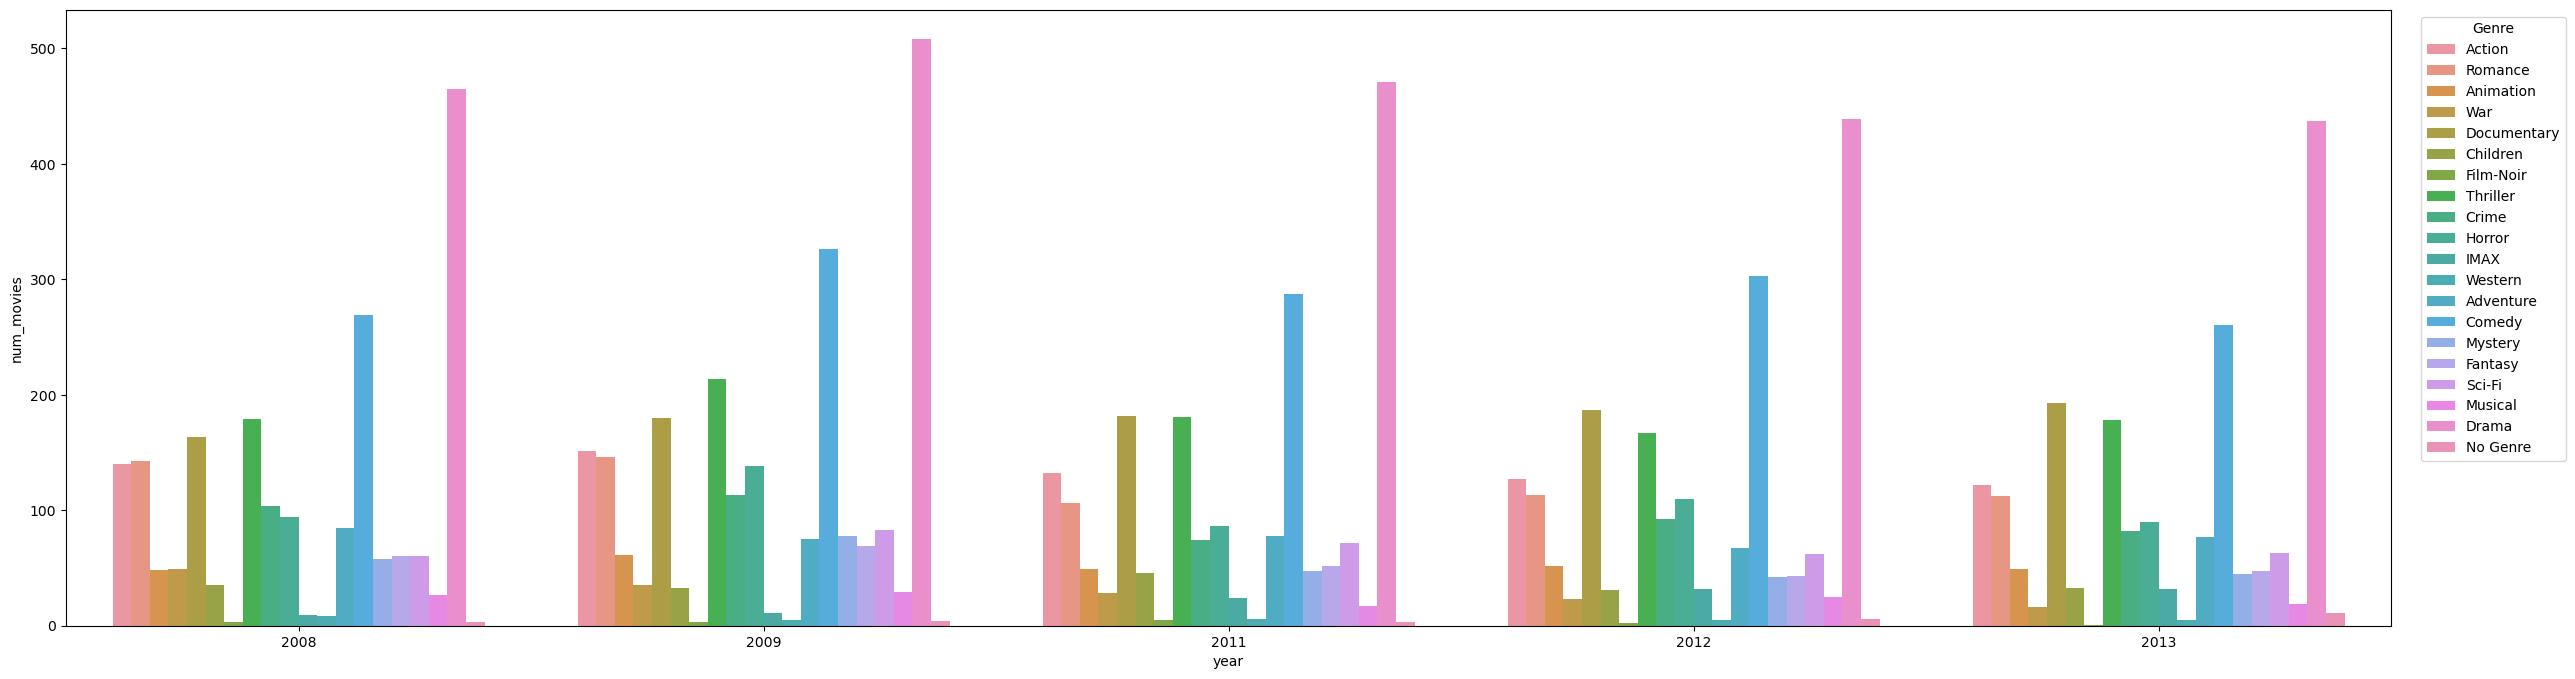

In [27]:
plt.figure(figsize=(30,8))

ax = sns.barplot(x = df_genres['year'],
            y = df_genres["num_movies"],
            hue= df_genres["genre"],
            errwidth=0)
#for i in ax.containers:
#    ax.bar_label(i,)

plt.legend(title='Genre', bbox_to_anchor=(1.01, 1), loc='upper left');


## **Rating CSV**

In [28]:
df_rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")

In [29]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [30]:
df_rating.tail()

,userId,movieId,rating,timestamp
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24
20000262,138493,71619,2.5,2009-10-17 20:25:36


In [31]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [32]:
print(f"Shape : {df_rating.shape} \nSize  :  {df_rating.size}")

Shape : (20000263, 4) 
Size  :  80001052


In [33]:
df_rating.sample(5)

,userId,movieId,rating,timestamp
15867776,109761,527,5.0,1999-12-17 03:48:16
908165,6082,1399,3.0,2000-02-14 00:36:03
15827563,109472,2944,5.0,1999-12-21 20:59:55
15267306,105540,1356,4.5,2004-07-08 08:41:54
946743,6363,4799,4.0,2001-12-01 17:43:56


In [34]:
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [35]:
df_rating.nunique()

userId         138493
movieId         26744
rating             10
timestamp    15351121
dtype: int64

In [36]:
df_rating.isna().sum()
#movie_df.dropna( )

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [37]:
df_rating.duplicated().sum()

0

In [38]:
df_rating['timestamp'] = pd.to_datetime(df_rating['timestamp'], errors='coerce')
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['time'] = df_rating['timestamp'].dt.time
df_rating['date'] = df_rating['timestamp'].dt.date

In [39]:
df_rating

,userId,movieId,rating,timestamp,year,month,time,date
0,1,2,3.5,2005-04-02 23:53:47,2005,4,23:53:47,2005-04-02
1,1,29,3.5,2005-04-02 23:31:16,2005,4,23:31:16,2005-04-02
2,1,32,3.5,2005-04-02 23:33:39,2005,4,23:33:39,2005-04-02
3,1,47,3.5,2005-04-02 23:32:07,2005,4,23:32:07,2005-04-02
4,1,50,3.5,2005-04-02 23:29:40,2005,4,23:29:40,2005-04-02
...,...,...,...,...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00,2009,11,15:42:00,2009-11-13
20000259,138493,69526,4.5,2009-12-03 18:31:48,2009,12,18:31:48,2009-12-03
20000260,138493,69644,3.0,2009-12-07 18:10:57,2009,12,18:10:57,2009-12-07
20000261,138493,70286,5.0,2009-11-13 15:42:24,2009,11,15:42:24,2009-11-13


In [40]:
print('Years :          ', df_rating.year.unique())
print('Months :         ', df_rating.month.unique())
print('Unique ratings : ', df_rating.rating.unique())
print('Average rating : ', round(df_rating.rating.mean(), 2))
print('Frequency of each rating value:\n',df_rating['rating'].value_counts())

Years :           [2005 2004 2000 1999 1996 1997 2002 2001 2009 2011 2008 2010 2007 1998
 2003 2015 2006 2014 2013 2012 1995]
Months :          [ 4  9 11 12  8  3  1  6  7 10  5  2]
Unique ratings :  [3.5 4.  3.  4.5 5.  2.  1.  2.5 0.5 1.5]
Average rating :  3.53
Frequency of each rating value:
 4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64


In [41]:
df = df_rating.sort_values('movieId')

In [42]:
df_ratings = df.merge(df_movie_titles, left_on='movieId', right_on='movieId', how='left')

<a name='rating_q1'></a>
### **1. Total Number of Per Rating**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


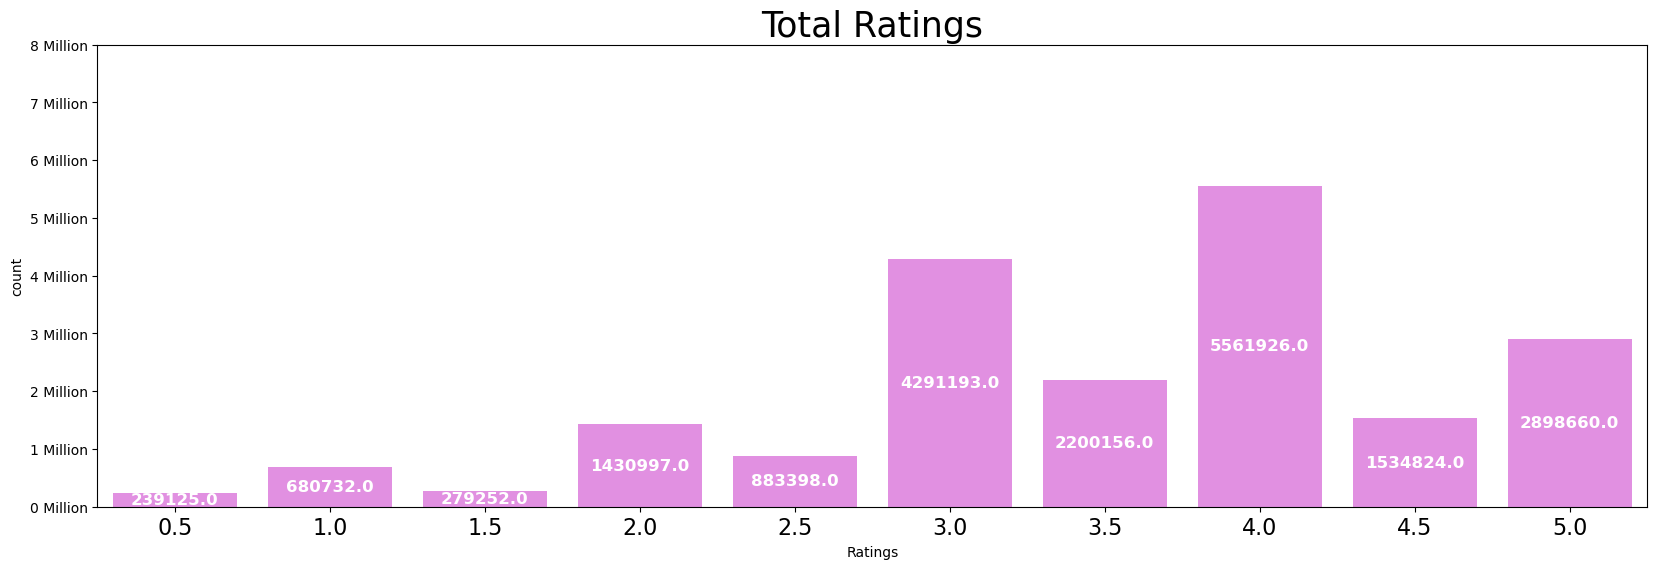

In [43]:
plt.figure(figsize= (20, 6))

ax = sns.countplot(data = df_ratings, x ="rating",
            color = 'violet')
ax.set_ylim(0, 8000000)
ylabels = ['{:.0f}'.format(x) + ' Million' for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = i.get_height(), 
            ha = 'center', va ='center', size = 12, weight = 'bold', rotation = 0, color = 'white')
    
plt.title('Total Ratings', size= 25)
plt.xlabel("Ratings")
plt.xticks(size= 16)

plt.show()

<a name='rating_q2'></a>

### **2. Find the counts of ratings for each year**

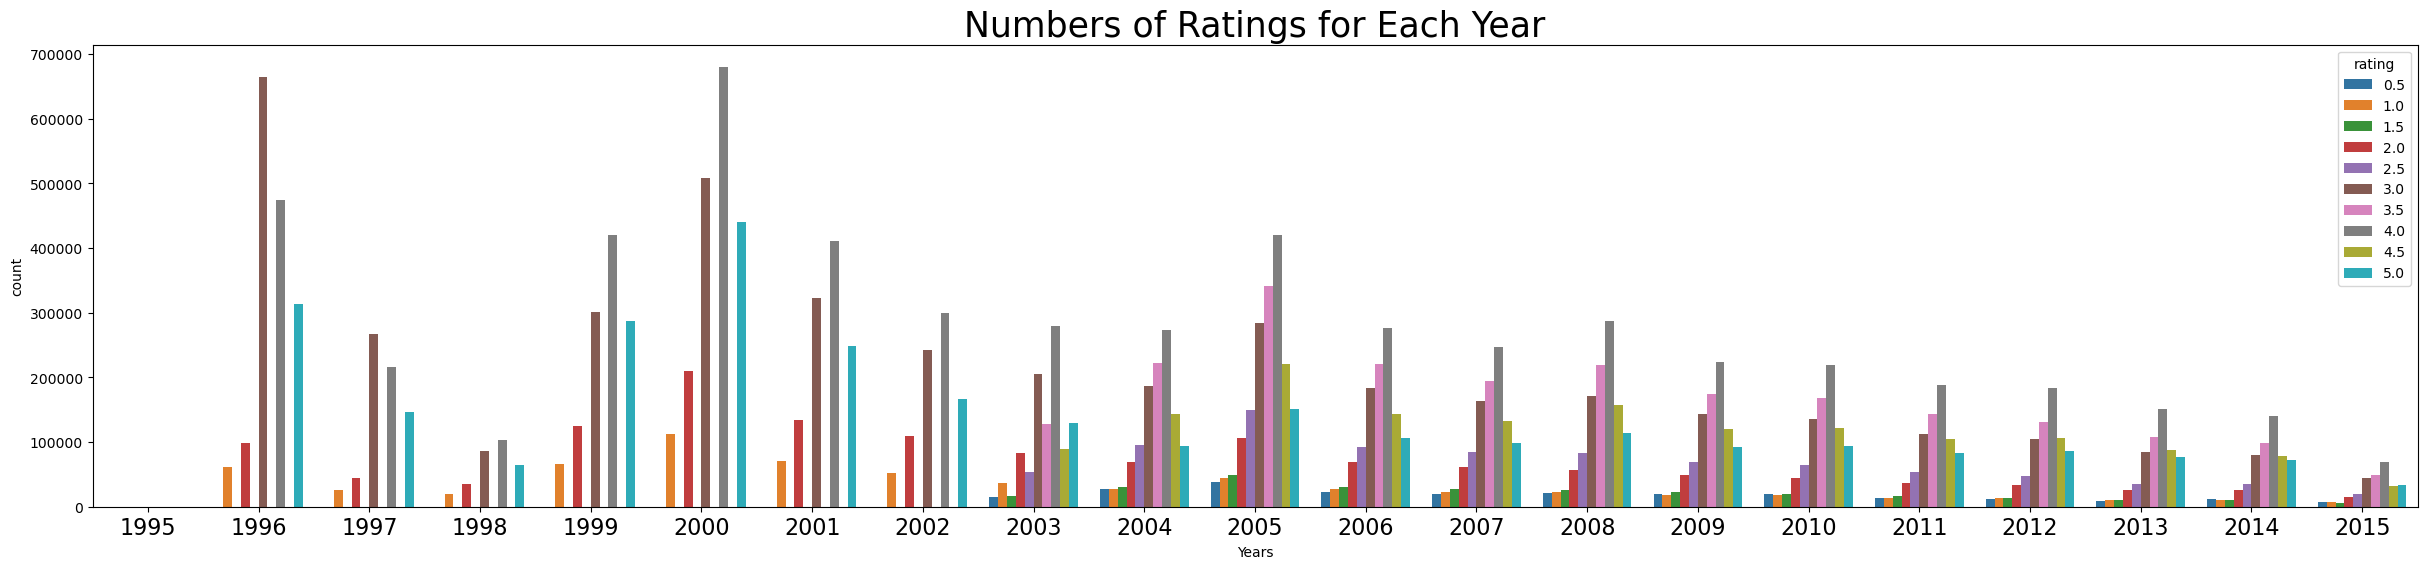

In [44]:
plt.figure(figsize= (30, 6))

sns.countplot(data = df_ratings, x=df_ratings.year,
              hue= df_ratings.rating)

plt.title('Numbers of Ratings for Each Year', size= 25)
plt.xlabel("Years")
plt.xticks(size= 16)

plt.show()

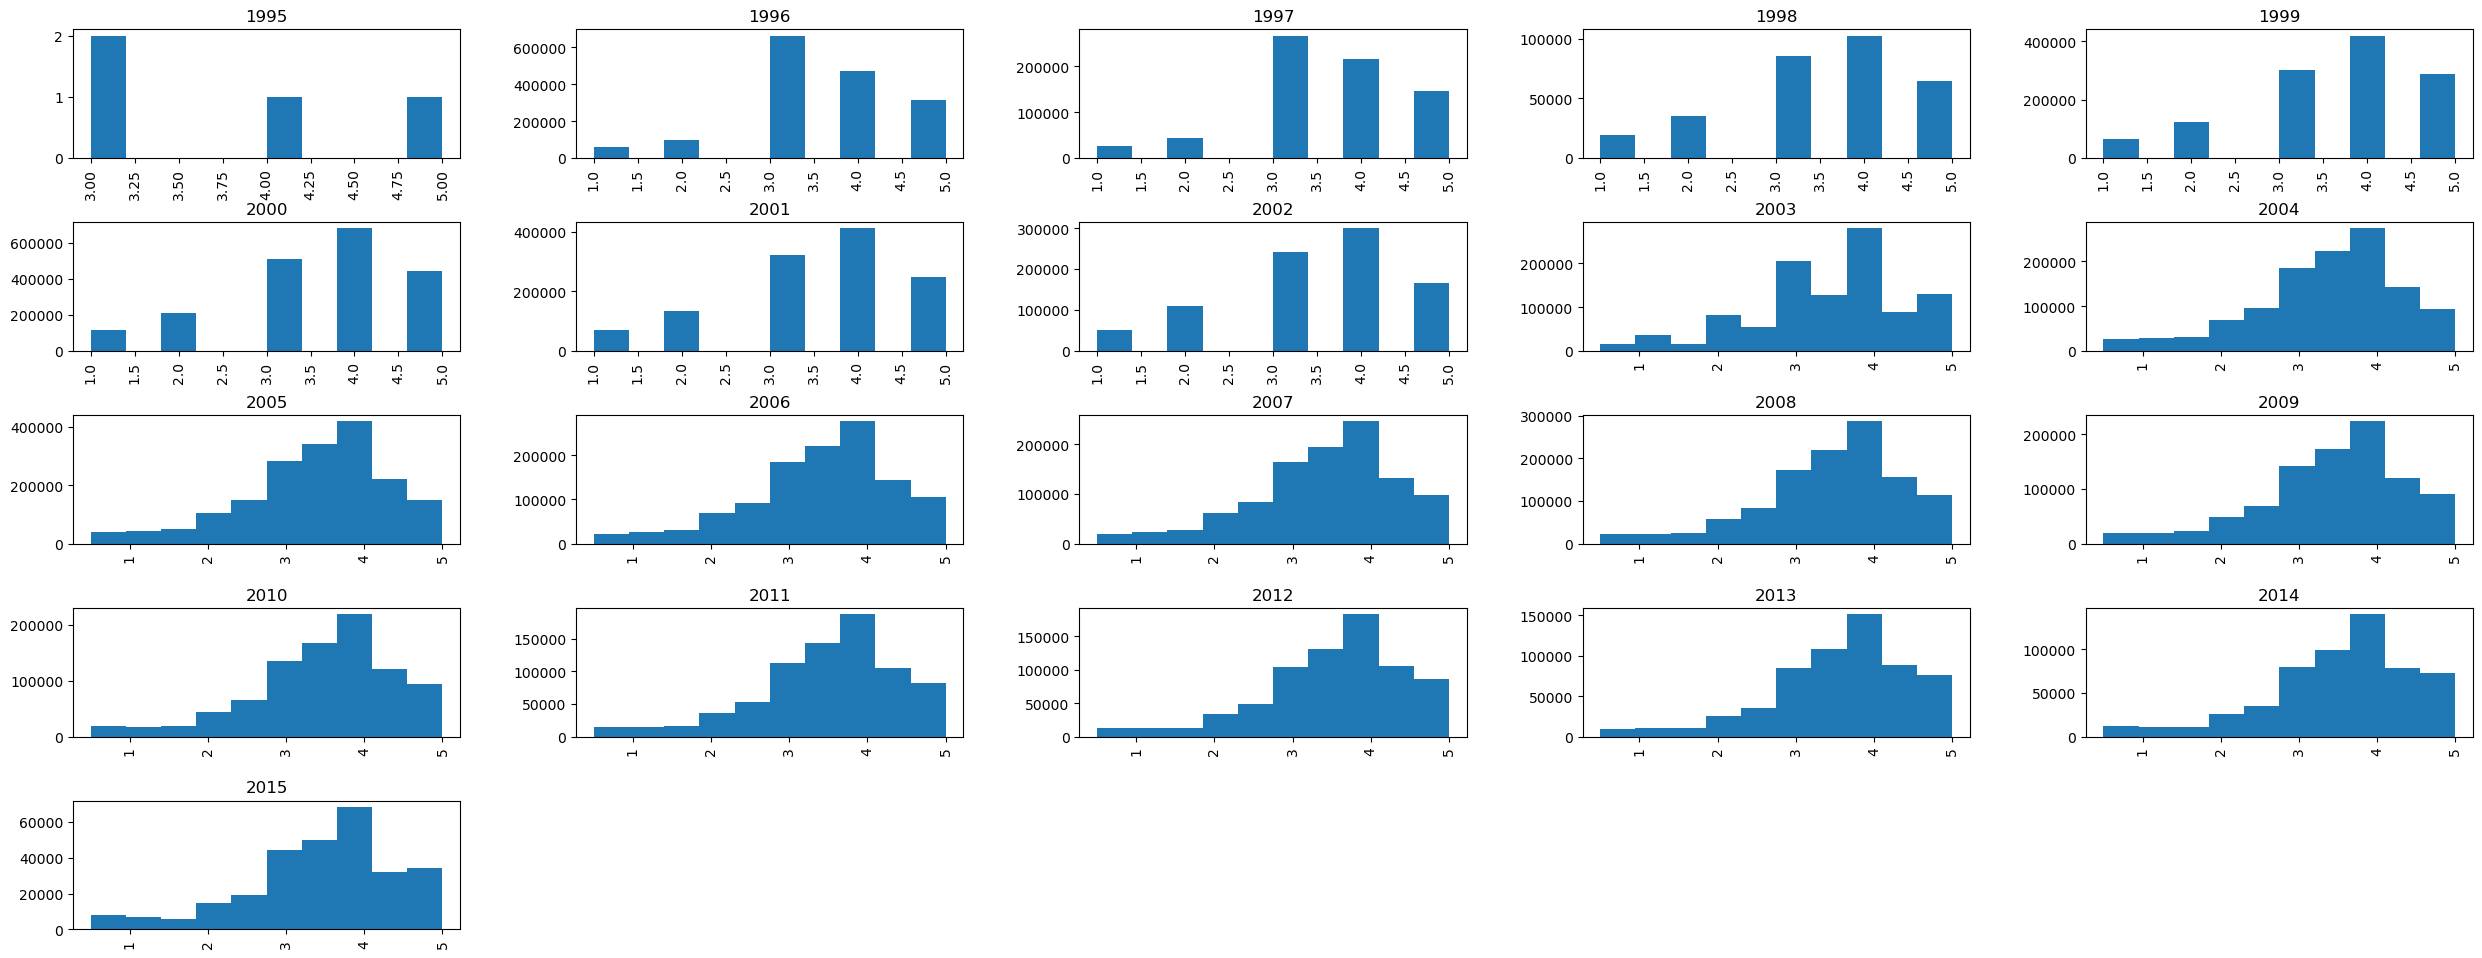

In [45]:
df_ratings['rating'].hist(by=df_ratings['year'], figsize=(30, 12));

<a name='rating_q3'></a>

### **3. Find the counts of ratings per month**

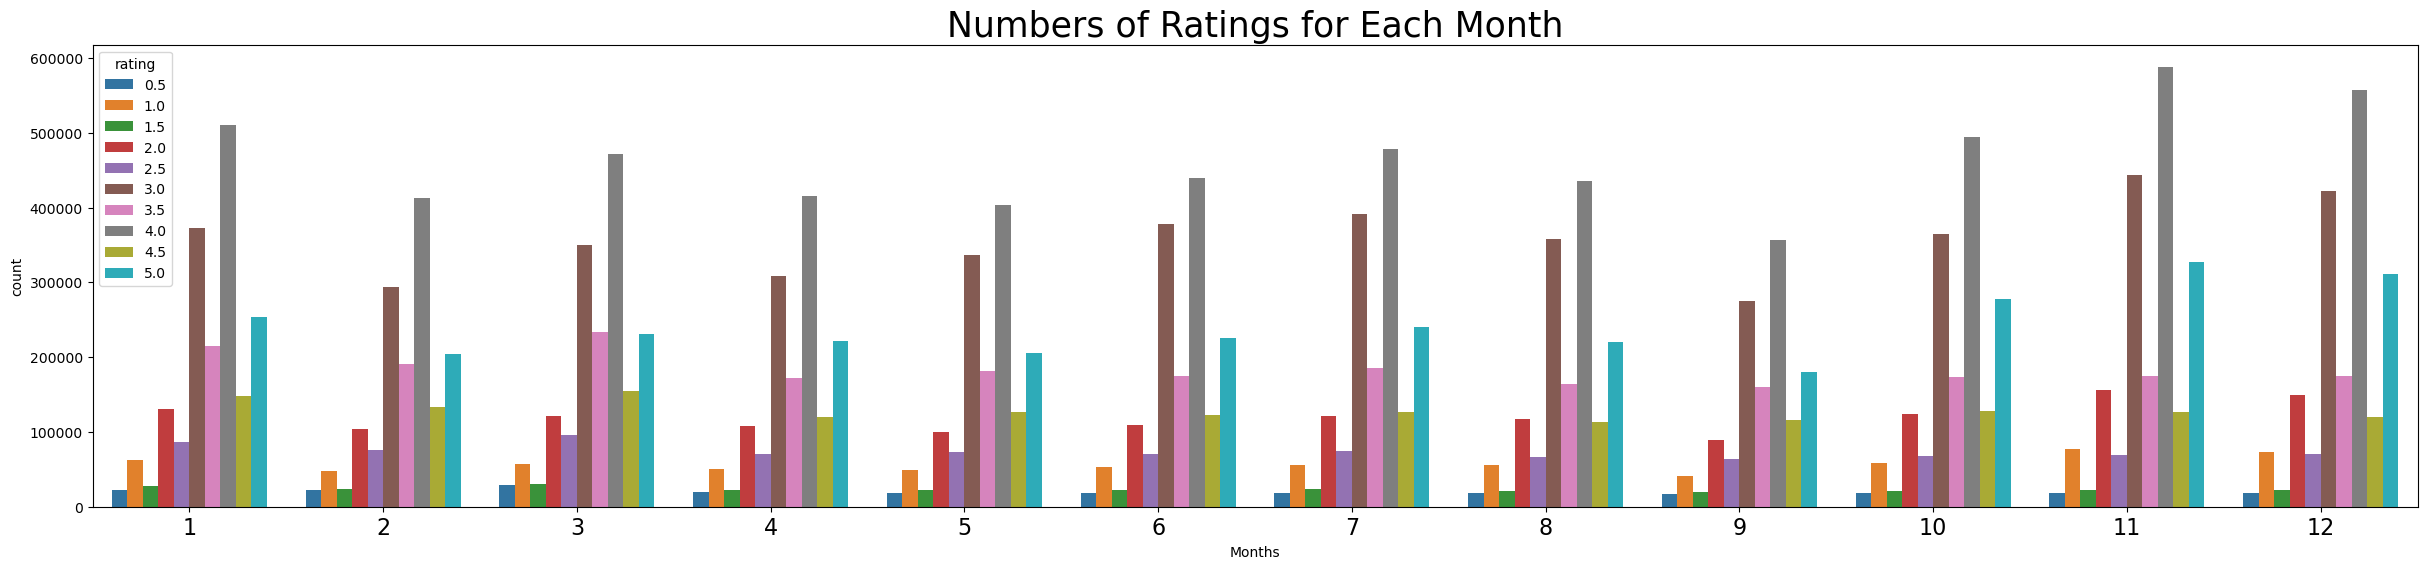

In [46]:
plt.figure(figsize= (30, 6))

sns.countplot(data = df_ratings, x=df_ratings.month,
              hue= df_ratings.rating)

plt.title('Numbers of Ratings for Each Month', size= 25)
plt.xlabel("Months")
plt.xticks(size= 16)
plt.show()

<a name='rating_q4'></a>

### **4. Find top 10 users based on counts of ratings. Visualize it.**

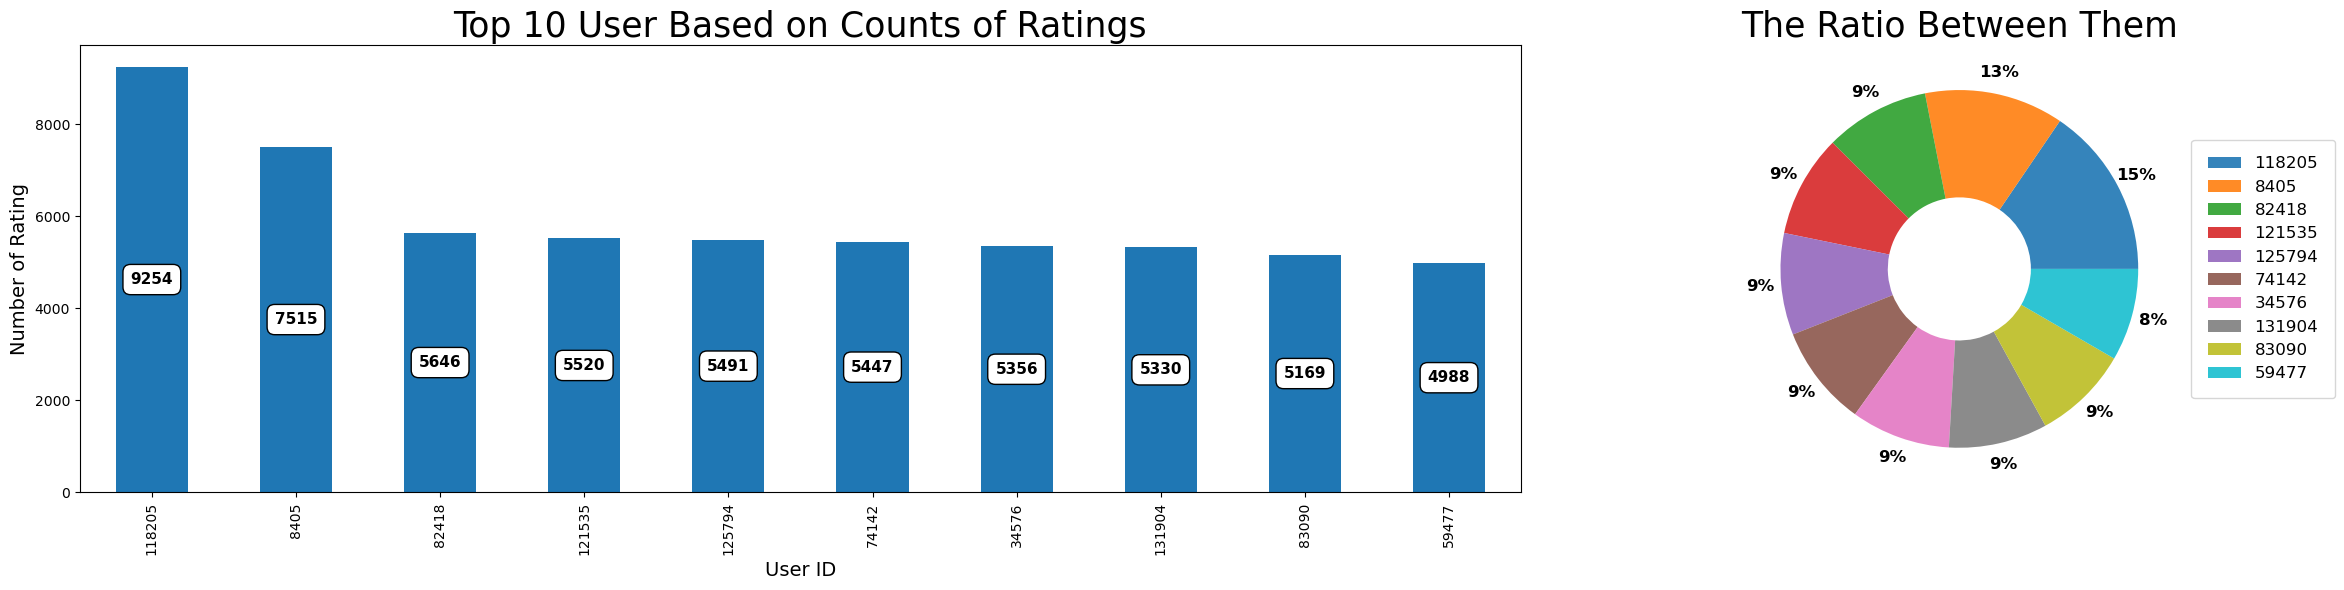

In [47]:
fig, axes = plt.subplots(1,2)


ax = df_ratings['userId'].value_counts()[:10].plot.bar(ax= axes[0], figsize=(30,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height()/2),
                va="center", ha="center",
                size = 11, weight = 'bold', rotation = 0, color = 'black',
                bbox=dict(boxstyle="round,pad=0.5", fc='white'))

ax.set_xlabel('User ID', fontsize=14)
ax.set_ylabel('Number of Rating', fontsize=14)
axes[0].set_title('Top 10 User Based on Counts of Ratings', size= 25);

df = df_ratings['userId'].value_counts()[:10].reset_index().rename(columns={'userId': 'count', 'index': 'userId'})
pie = plt.pie(
    df['count'], 
    wedgeprops=dict(width=0.6, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12, 
    textprops={
        'fontsize': 12, 
        'fontweight': 'bold'});

axes[1].legend(df['userId'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), borderpad=1, fontsize=12)
axes[1].set_title('The Ratio Between Them', size= 25);

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()

<a name='rating_q5'></a>

### **5. Count of unique users per year**

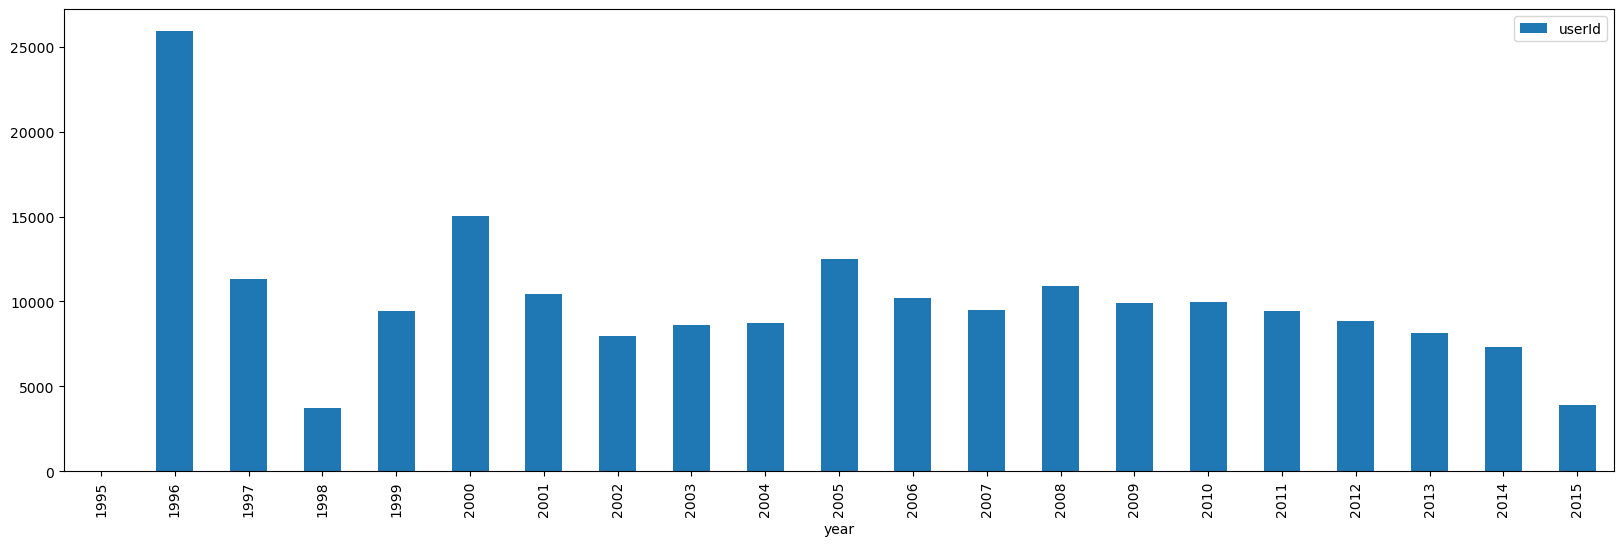

In [48]:
df_temp = df_ratings[['year', 'userId']].groupby(['year']).nunique().reset_index()
df_temp.plot.bar(x='year', y='userId',figsize=(20,6));

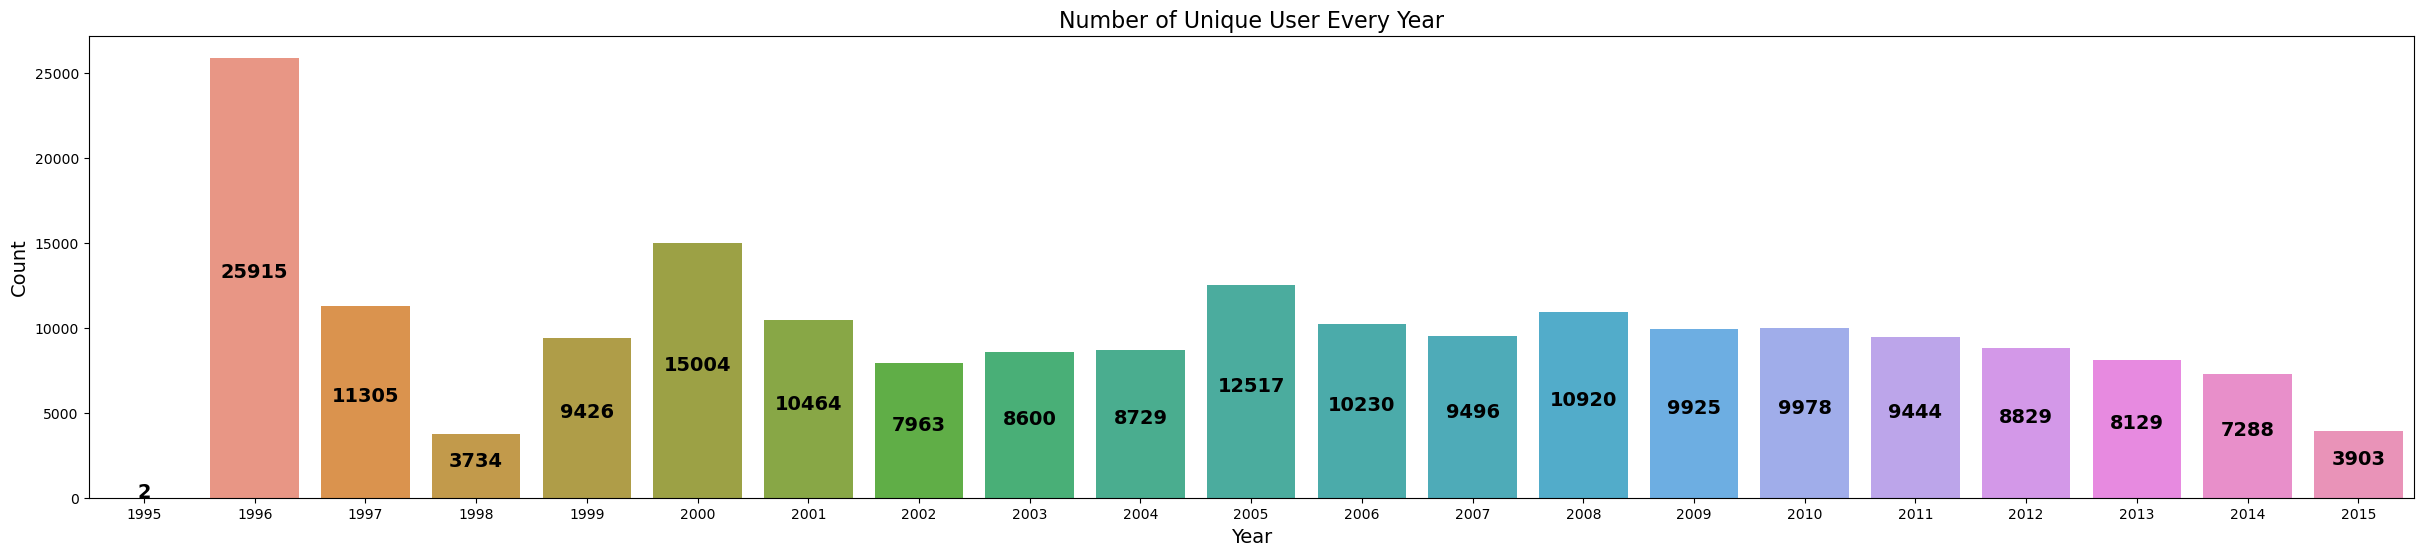

In [49]:
df_temp = df_ratings[['year', 'userId']].groupby(['year']).nunique().reset_index()

plt.figure(figsize= (30, 6))
ax = sns.barplot(x = 'year', y = 'userId', data = df_temp);

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()), 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.title('Number of Unique User Every Year', fontsize=16);
plt.show()

<a name='rating_q6'></a>
### **6. Find the 10 Rated Movies and Counts**

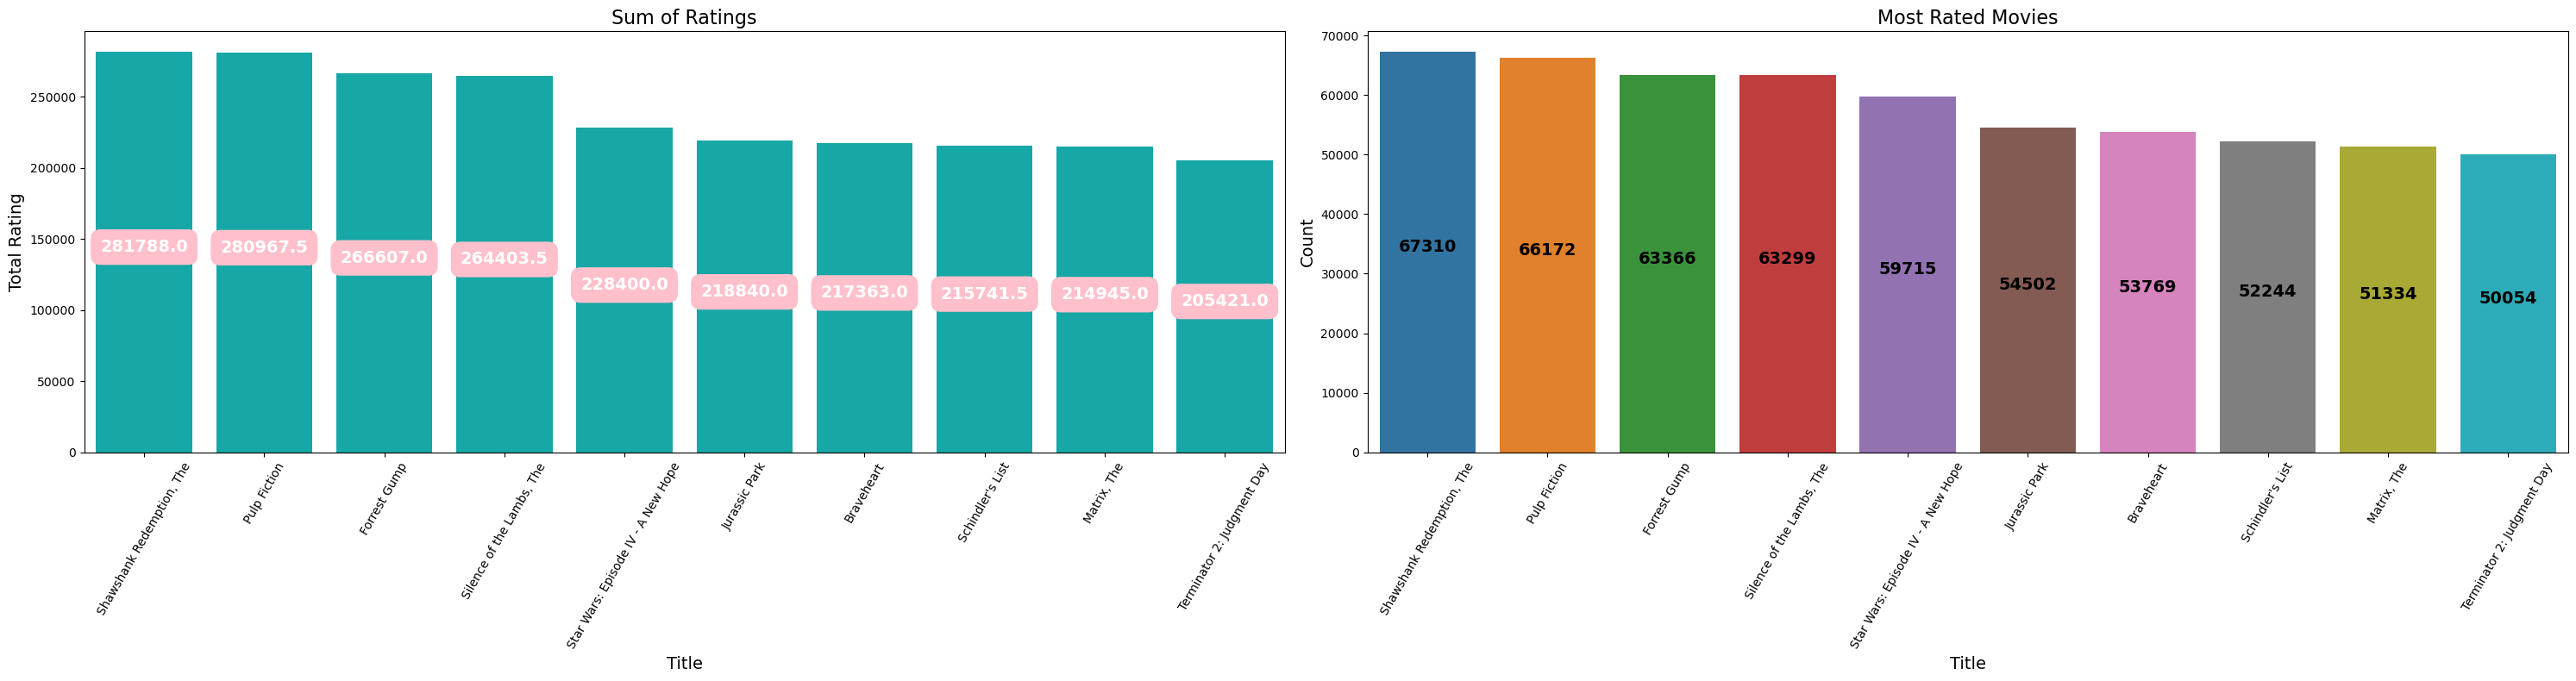

In [50]:
fig, axs = plt.subplots(1,2, figsize = (30, 8))

df_sum = df_ratings.groupby(['title', 'movieId']).sum(['Rating Mean']).sort_values('rating', ascending=False).reset_index().iloc[0:10,:]
ax= sns.barplot(ax = axs[0], x = 'title', y = 'rating', data = df_sum, color = 'c')
for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Total Rating', fontsize=14)
ax.set_xticklabels(df_sum["title"], rotation=60)
axs[0].set_title('Sum of Ratings', fontsize=16)

df = df_ratings.groupby(['title', 'movieId']).count().sort_values(by='rating',ascending=False).reset_index().iloc[0:10,:]
ax2= sns.barplot( x = 'title', y = 'userId', data = df)
for i in ax2.patches:    
    ax2.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()), 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black')
ax2.set_xlabel('Title', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_xticklabels(df_sum["title"], rotation=60)

axs[1].set_title('Most Rated Movies', fontsize=16)

plt.tight_layout()
plt.show()


<a name='rating_q7'></a>

### **7. Top 10 Movies by Overall Rating (Sum of Rating/count of rating)**

Here, as you can see all of them are rated once

In [51]:
df_ra  = df_ratings.groupby(['title','movieId']).sum(['Rating Mean']).sort_values('rating', ascending=False).reset_index()
df_occ = df_ratings.groupby(['title','movieId']).count().sort_values(by='rating',ascending=False).reset_index()
df_ra = df_ra[['movieId','title','rating']]
df_occ = df_occ[['movieId','userId']]

In [52]:
df_temp = df_occ.merge(df_ra, left_on='movieId', right_on='movieId', how='left')

In [53]:
df_temp['Rating Score'] = (df_temp['rating']/df_temp['userId']).round(2)
df_overall = df_temp.sort_values(by='Rating Score',ascending=False).reset_index().loc[0:10,:]

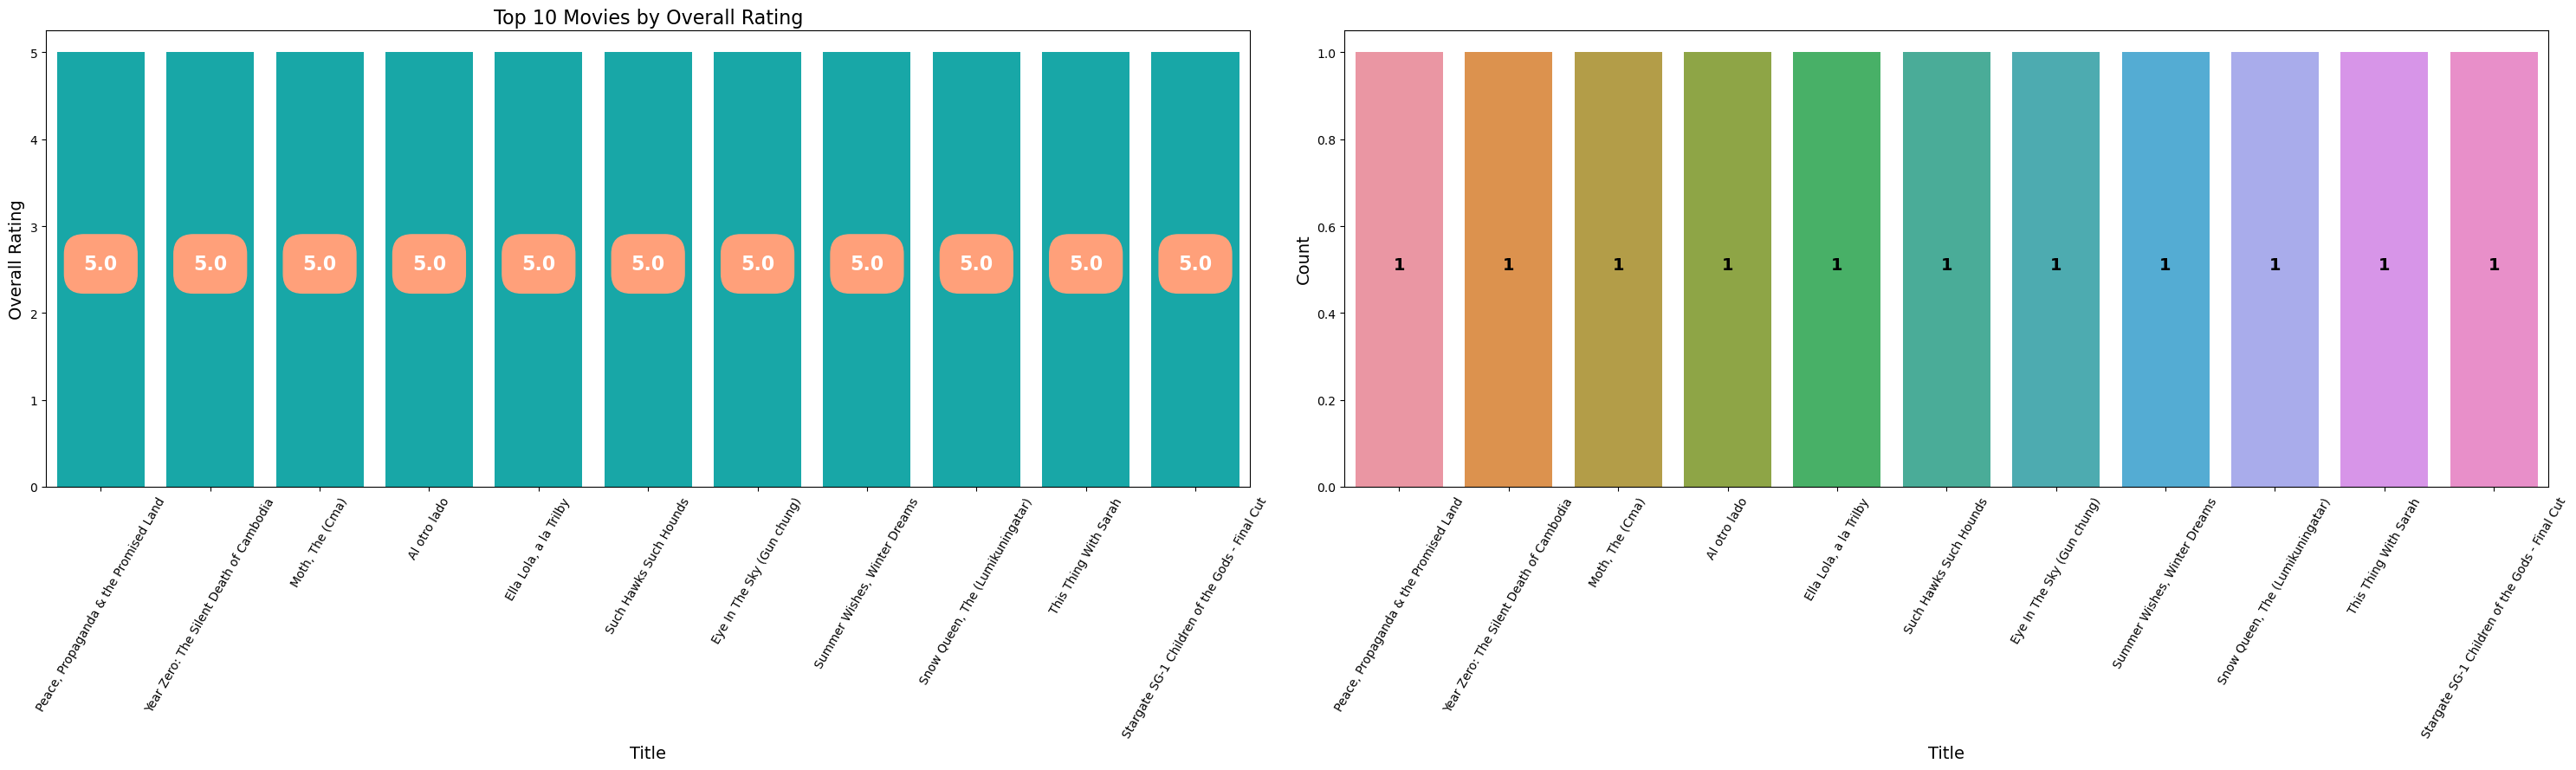

In [54]:
fig, axs = plt.subplots(1,2, figsize = (30, 9))

ax = sns.barplot( ax = axs[0], x = 'title', y = 'Rating Score', data = df_overall, color='c')
for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = i.get_height(), 
            ha = 'center', size = 16, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=1.0", fc='lightsalmon', ec='lightsalmon'))
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Overall Rating', fontsize=14)
ax.set_xticklabels(df_overall["title"], rotation=60)
axs[0].set_title('Top 10 Movies by Overall Rating', fontsize=16)


ax2= sns.barplot( x = 'title', y = 'userId', data = df_overall)
for i in ax2.patches:    
    ax2.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()), 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black')
ax2.set_xlabel('Title', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_xticklabels(df_overall["title"], rotation=60)

plt.tight_layout()
plt.show()

<a name='rating_q8'></a>
### **8. Top 10 Movies by Overall Rating (With over 500 ratings count)**

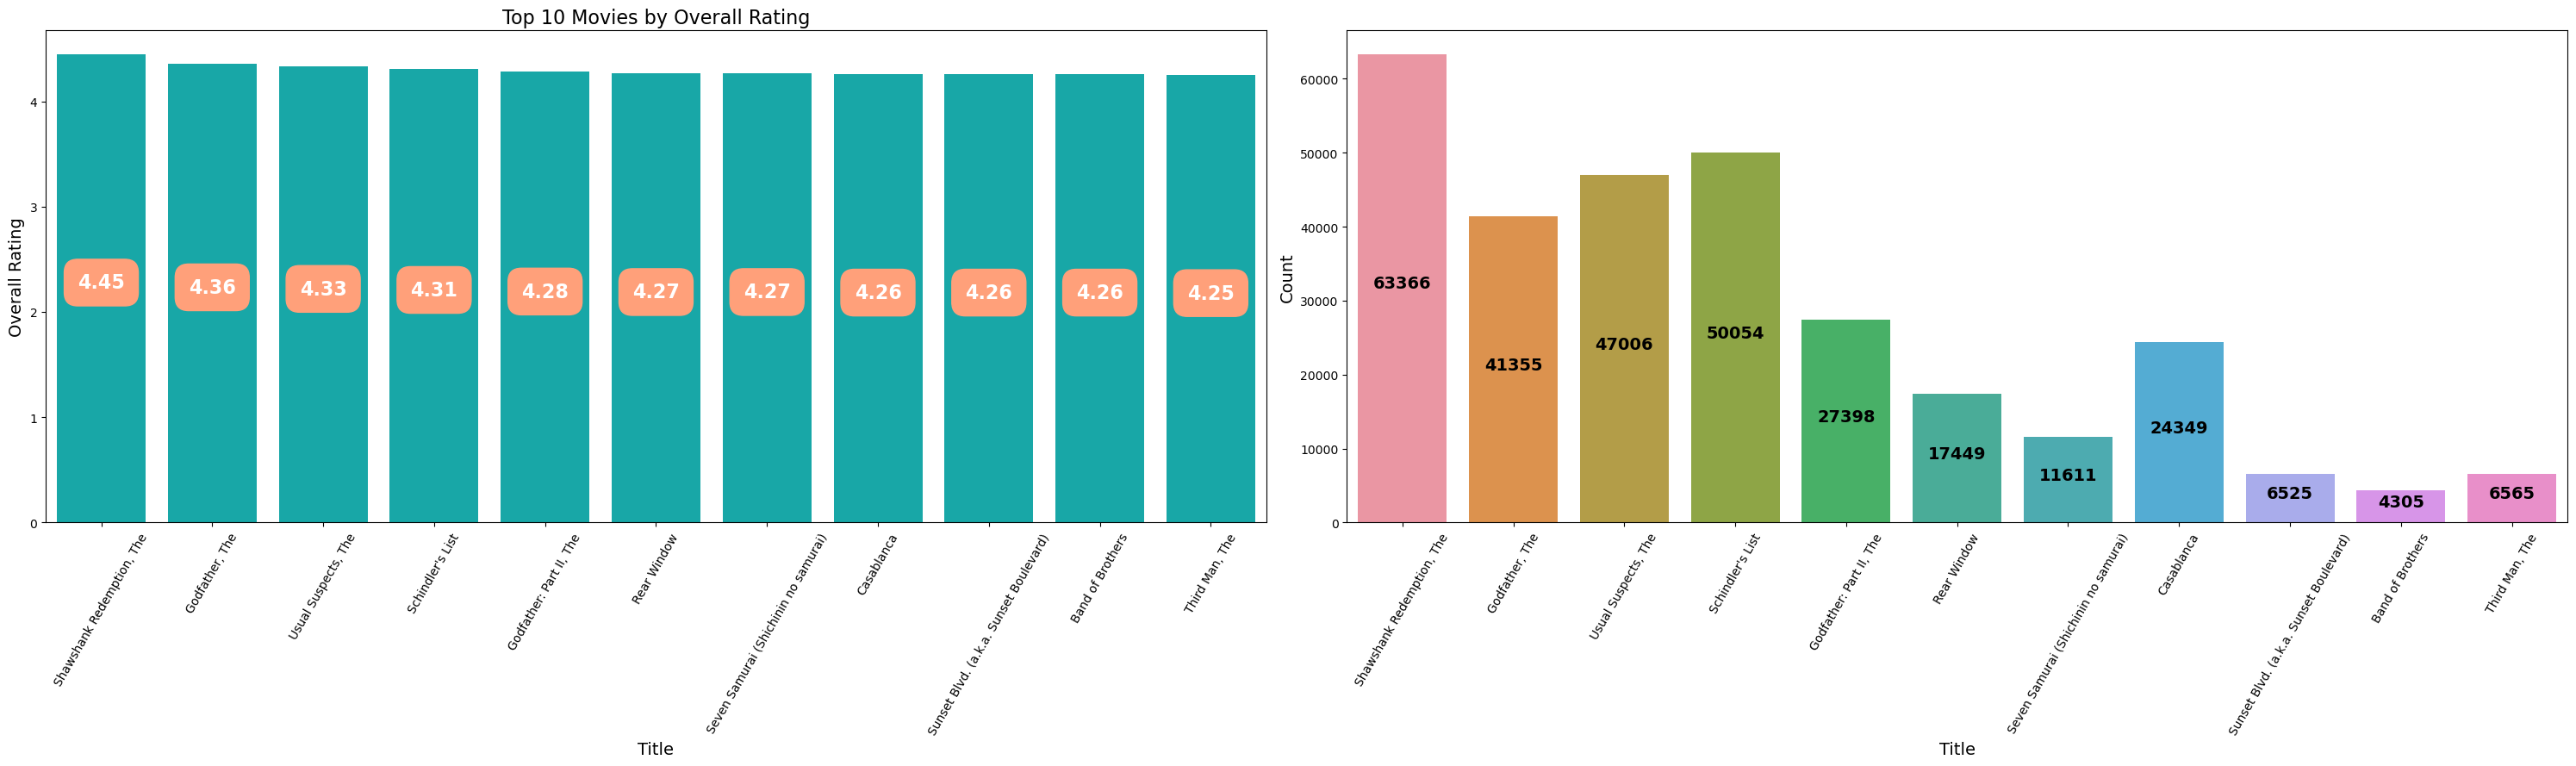

In [55]:
df_overall = df_temp[df_temp['userId'] >500].sort_values(by='Rating Score',ascending=False).reset_index().loc[0:10,:]
fig, axs = plt.subplots(1,2, figsize = (30, 9))

ax = sns.barplot( ax = axs[0], x = 'title', y = 'Rating Score', data = df_overall, color='c')
for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = i.get_height(), 
            ha = 'center', size = 16, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.7", fc='lightsalmon', ec='lightsalmon'))
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Overall Rating', fontsize=14)
ax.set_xticklabels(df_overall["title"], rotation=60)
axs[0].set_title('Top 10 Movies by Overall Rating', fontsize=16)

ax2= sns.barplot( x = 'title', y = 'userId', data = df_overall)
for i in ax2.patches:    
    ax2.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()), 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black')
ax2.set_xlabel('Title', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_xticklabels(df_overall["title"], rotation=60)

plt.tight_layout()
plt.show()